In [9]:
# Imports
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import pickle
import tifffile
import torch


sys.path.append(os.path.abspath('..'))
from scripts.plotting import PlotController
from utils import move_data_to_device, move_dict_to_cpu


In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Plotting Jaccard index vs density for different snrs

In [13]:
# Load dicts
with open(r"/Users/august/Desktop/bachelor/bachelor1/measurements/densities_3snr.pkl", "rb") as f:
    snr3_density = pickle.load(f)
    snr3_density = move_dict_to_cpu(snr3_density)
with open(r"/Users/august/Desktop/bachelor/bachelor1/measurements/densities_5snr.pkl", "rb") as f:
    snr5_density = pickle.load(f)
    snr5_density = move_dict_to_cpu(snr5_density)
with open(r"/Users/august/Desktop/bachelor/bachelor1/measurements/densities_8snr.pkl", "rb") as f:
    snr8_density = pickle.load(f)
    snr8_density = move_dict_to_cpu(snr8_density)
with open(r"/Users/august/Desktop/bachelor/bachelor1/measurements/densities_10snr.pkl", "rb") as f:
    snr10_density = pickle.load(f)
    snr10_density = move_dict_to_cpu(snr10_density)

ds3 = np.array(list(snr3_density.keys()))
jis3 = np.array([snr3_density[density]['avg ji'] for density in ds3])
ds5 = np.array(list(snr5_density.keys()))
jis5 = np.array([snr5_density[density]['avg ji'] for density in ds5])
ds8 = np.array(list(snr8_density.keys()))
jis8 = np.array([snr8_density[density]['avg ji'] for density in ds8])
ds10 = np.array(list(snr10_density.keys()))
jis10 = np.array([snr10_density[density]['avg ji'] for density in ds10])

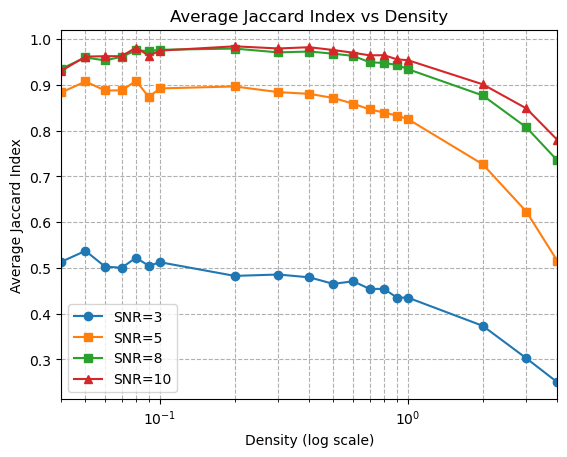

In [16]:
# Plotting

plt.semilogx(ds3, jis3, marker='o', linestyle='-', label='SNR=3')
plt.semilogx(ds5, jis5, marker='s', linestyle='-', label='SNR=5')
plt.semilogx(ds8, jis8, marker='s', linestyle='-', label='SNR=8')
plt.semilogx(ds10, jis10, marker='^', linestyle='-', label='SNR=10')

plt.xlabel('Density (log scale)')
plt.ylabel('Average Jaccard Index')
plt.title('Average Jaccard Index vs Density')
plt.xlim(0.04, 4)
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

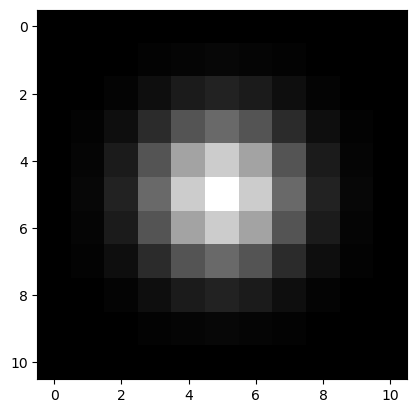

In [20]:
def make_psf(sigma, intensity, subpos):
    radius = int(np.ceil(3 * sigma))
    array = np.zeros((radius * 2 + 1, radius * 2 + 1))
    yy, xx = np.ogrid[-radius:radius + 1, -radius:radius + 1]
    subpos = (subpos[0] - 0.5, subpos[1] - 0.5)
    r2 = (xx - subpos[0]) ** 2 + (yy - subpos[1]) ** 2
    signals = np.exp(-r2 / (2 * sigma ** 2))
    array = signals * intensity
    return array.astype(np.float32)

psf = make_psf(1.5, 1000, (0.5, 0.5))
plt.imshow(psf, cmap='gray')